<a href="https://colab.research.google.com/github/Arainal0112/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama : Arainal Aldiansyah
- Kelas : TI - 3C
- Absen : 3

In [1]:
from google.colab import drive

#Akses google drive
drive.mount('/content/drive')

Mounted at /content/drive


## Praktikum 1

In [9]:
# Import
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### 1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


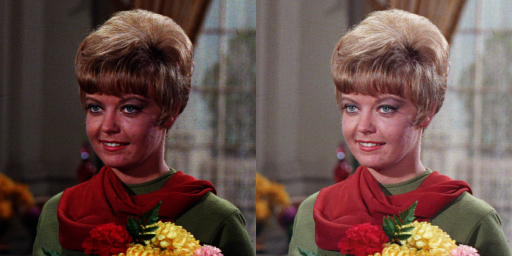

In [14]:
print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/female.tiff')

gamma_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]): # mengakses baris
  for x in range(img.shape[1]): # mengakses kolom
    for c in range(img.shape[2]): # mengakses channel warna
     gamma_image[y, x, c] = np.clip(255 * pow(img[y, x, c]/255,(1/gamma)), 0, 255) #pow = pangkat , clip untuk membatasi warna pada rentang 0 - 255

final_frame = cv.hconcat((img, gamma_image))
cv2_imshow(final_frame)

2. Image Depth

 Image Depth pada citra 
----------------------------------


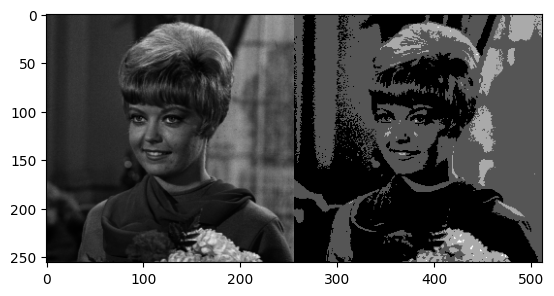

In [16]:
print(' Image Depth pada citra ')
print('----------------------------------')

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
img = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/female.tiff', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
depth_image = np.zeros(original.shape, original.dtype)  # Initialize depth_image array

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            depth_image[y, x, c] = np.clip(round(original[y, x, c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame)

3. Average Denoising


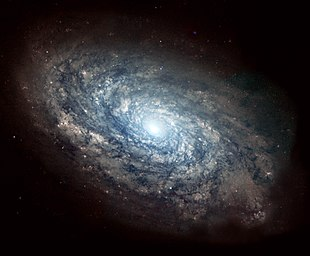

In [23]:
img_galaxy = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')
original_galaxy= cv.cvtColor(img_galaxy,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(original_galaxy)

Jumlah Citra = 5

Jumlah Citra	:  5
Nilai PSNR	:  19.53183505131462 (dB)


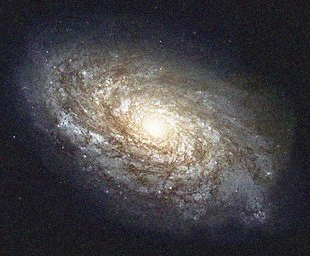

In [41]:
from math import log10, sqrt
import glob

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: # MSE 0 maka tidak ada noise sama sekali, sehingga tidak perlu PSNR.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Gambar original
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)

jumlah_citra = 5
for i in range(jumlah_citra):
  denoised_image = denoised_image + cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_citra)

psnr= PSNR(img1, denoised_image)

print('Jumlah Citra\t: ', jumlah_citra)
print('Nilai PSNR\t: ', psnr, '(dB)')

cv2_imshow(denoised_image)


Jumlah Citra = 10

Jumlah Citra	:  10
Nilai PSNR	:  19.736855752099096 (dB)


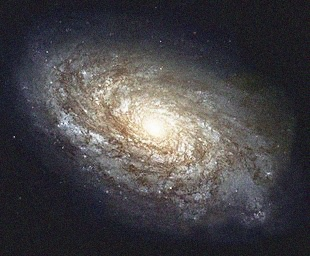

In [42]:
from math import log10, sqrt
import glob

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: # MSE 0 maka tidak ada noise sama sekali, sehingga tidak perlu PSNR.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Gambar original
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)

jumlah_citra = 10
for i in range(jumlah_citra):
  denoised_image = denoised_image + cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_citra)

psnr= PSNR(img1, denoised_image)

print('Jumlah Citra\t: ', jumlah_citra)
print('Nilai PSNR\t: ', psnr, '(dB)')

cv2_imshow(denoised_image)


Jumlah Citra = 20

Jumlah Citra	:  20
Nilai PSNR	:  19.840470279961274 (dB)


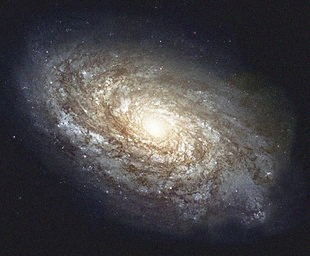

In [43]:
from math import log10, sqrt
import glob

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: # MSE 0 maka tidak ada noise sama sekali, sehingga tidak perlu PSNR.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Gambar original
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)

jumlah_citra = 20
for i in range(jumlah_citra):
  denoised_image = denoised_image + cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_citra)

psnr= PSNR(img1, denoised_image)

print('Jumlah Citra\t: ', jumlah_citra)
print('Nilai PSNR\t: ', psnr, '(dB)')

cv2_imshow(denoised_image)


Jumlah Citra = 40

Jumlah Citra	:  40
Nilai PSNR	:  19.89209983567552 (dB)


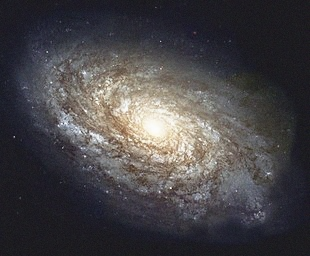

In [45]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: # MSE 0 maka tidak ada noise sama sekali, sehingga tidak perlu PSNR.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Gambar original
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)

jumlah_citra = 40
for i in range(jumlah_citra):
  denoised_image = denoised_image + cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_citra)

psnr= PSNR(img1, denoised_image)

print('Jumlah Citra\t: ', jumlah_citra)
print('Nilai PSNR\t: ', psnr, '(dB)')

cv2_imshow(denoised_image)


Jumlah Citra = 80

Jumlah Citra	:  80
Nilai PSNR	:  19.916173174029357 (dB)


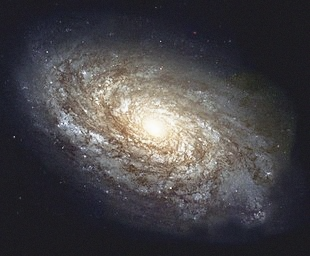

In [46]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: # MSE 0 maka tidak ada noise sama sekali, sehingga tidak perlu PSNR.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Gambar original
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)

jumlah_citra = 80
for i in range(jumlah_citra):
  denoised_image = denoised_image + cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_citra)

psnr= PSNR(img1, denoised_image)

print('Jumlah Citra\t: ', jumlah_citra)
print('Nilai PSNR\t: ', psnr, '(dB)')

cv2_imshow(denoised_image)


Jumlah Citra : 100

Jumlah Citra	:  100
Nilai PSNR	:  19.92196095594035 (dB)


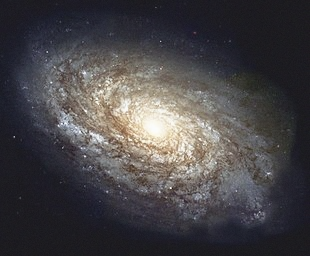

In [47]:
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0: # MSE 0 maka tidak ada noise sama sekali, sehingga tidak perlu PSNR.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Gambar original
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/galaxy.jpg')

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/Pertemuan_5/noises/*'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)

jumlah_citra = 100
for i in range(jumlah_citra):
  denoised_image = denoised_image + cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_citra)

psnr= PSNR(img1, denoised_image)

print('Jumlah Citra\t: ', jumlah_citra)
print('Nilai PSNR\t: ', psnr, '(dB)')

cv2_imshow(denoised_image)


1. PSNR Jumlah Citra 5 : 19.5318
2. PSNR Jumlah Citra 10 : 19.7368
3. PSNR Jumlah Citra 20 : 19.8404
4. PSNR Jumlah Citra 40 : 19.8920
5. PSNR Jumlah Citra 80 : 19.9161
6. PSNR Jumlah Citra 100 : 19.9219

# Kesimpulan :
Semakin banyak jumlah citra yang dirata-rata maka nilai PNSRnya akan menjadi lebih besar, dan membuat noise pada citra menjadi semakin sedikit.

4. Masking

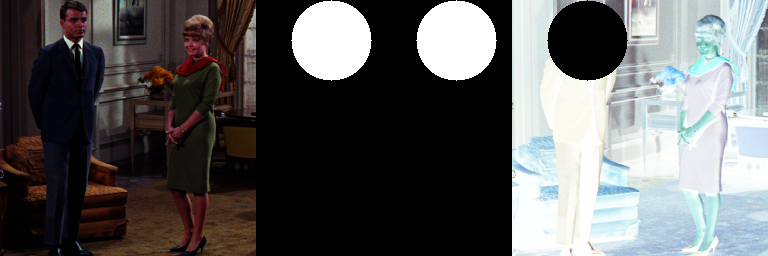

In [48]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~ img4 & ~ mask # OPERASI NOT

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

# OR

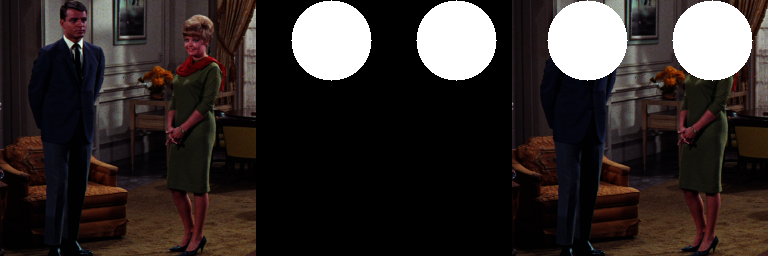

In [49]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 | mask1 # Operasi OR

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)


# AND

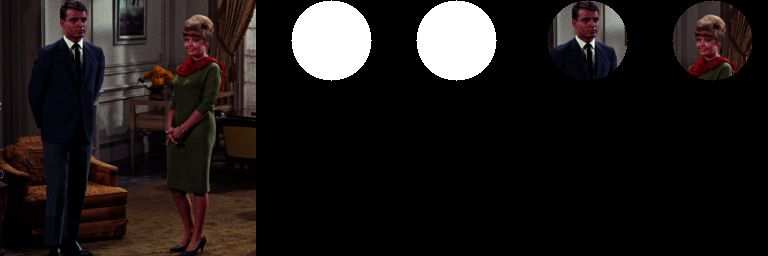

In [51]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)



mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 & mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

## NAND

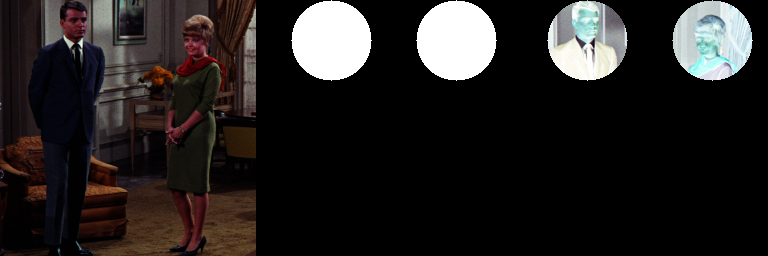

In [52]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~ img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~ img4 & mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

XOR

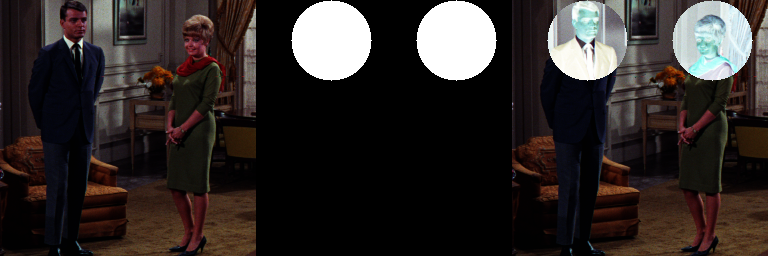

In [53]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/couple.tiff')
mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 ^ mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 ^ mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

# Tugas

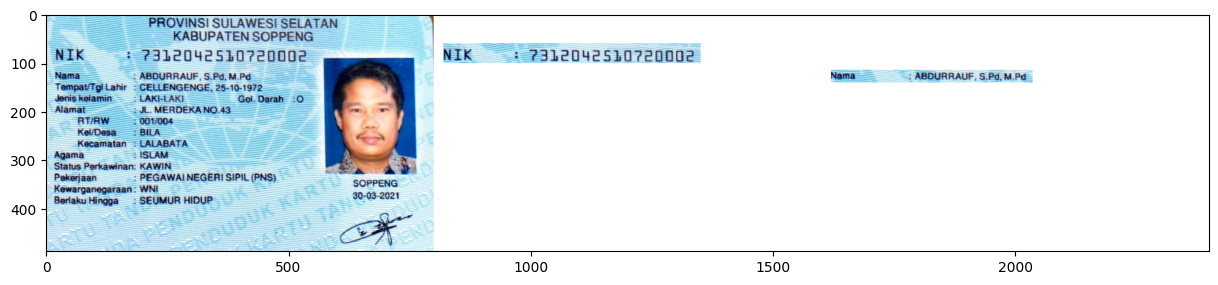

In [ ]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/KTP.jpeg')
img_ktp2 = cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB)

image_masking1 = np.zeros(img_ktp2.shape, dtype=np.uint8) # Mengambil ukuran dari img_ktp

masking1 = cv.rectangle(image_masking1, pt1=(20,60), pt2=(550,100), color=(255,255,255), thickness=cv.FILLED)

image_masking2 = np.zeros(img_ktp2.shape, dtype=np.uint8) # Mengambil ukuran dari img_ktp
masking2 = cv.rectangle(image_masking2, pt1=(20,115), pt2=(435,140), color=(255,255,255), thickness=cv.FILLED)

#Operasi NOT pada img_ktp2 dengan membalikan nilai bit
original = ~ img_ktp2

#Operasi And
original = ~img_ktp2
nik = ~(image_masking1 & original)
cv.imwrite('/content/drive/MyDrive/PCVK/Pertemuan_5/nik.jpg', cv.cvtColor(nik, cv.COLOR_RGB2BGR))

nama = ~(image_masking2 & original)
cv.imwrite('/content/drive/MyDrive/PCVK/Pertemuan_5/nama.jpg', cv.cvtColor(nama, cv.COLOR_RGB2BGR))

final_frame = cv.hconcat((img_ktp2, nik, nama))
plt.figure(figsize=(15, 5)) # Mengatur ukuran tampilan
plt.imshow(final_frame)
plt.show()


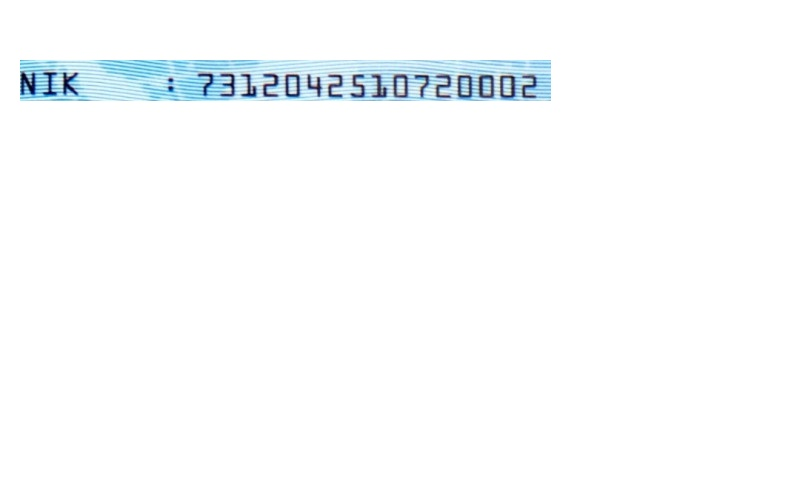

In [ ]:
nik = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan_5/nik.jpg')
cv2_imshow(nik)